In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from matplotlib.offsetbox import AnchoredText
plt.rc('font', family='Arial')

In [2]:
file = '/Users/irffanalahi/Research/Research_update/SoftRD/largerEXP/BL22_tiered/PBMC_decon/trytoreproduce_em4_cm4/perctcorr/softRC/cm4_mean_result_dupindex_binnedstats.pkl_maxscore_CSxOut.txt_cytof_fixedDCm5trfixed.txt'
data = pd.read_csv(file, sep='\t', index_col=0)
df = pd.DataFrame(data)

#Cytof
#order = ['NaiveCD4','cm4', 'em4','Tregs','NK','Mono','NaiveCD8','cm8','em8','ed8', 'nB','mB']

#Flow

x='cm4_real'
y='cm4'

colors = ['b','c','g','r','m','y','tab:blue','tab:orange','tab:purple','tab:pink','darkviolet','dodgerblue', 'coral', 'brown']

row_num = 2
col_num = 4

df.columns

Index(['NaiveCD4', 'NaiveCD8', 'nB', 'NK', 'PC', 'Mono', 'M0', 'M1', 'M2',
       'iDC', 'mDC', 'PMN', 'cm8', 'em8', 'Eo', 'Tregs', 'em4', 'ed8', 'Mg',
       'cm4', 'Er', 'mB', 'Mono_real', 'NK_real', 'mB_real', 'nB_real',
       'NaiveCD4_real', 'NaiveCD8_real', 'Tregs_real', 'cm4_real', 'em4_real',
       'cm8_real', 'em8_real', 'ed8_real', 'PC_real'],
      dtype='object')

In [3]:
def renamect(act):
    if act=='CD4':
        return 'Naive CD4 T'
    if act=='CD8':
        return 'Naive CD8 T'

    if act=='NaiveCD4':
        return 'Naive CD4 T'
    if act=='NaiveCD8':
        return 'Naive CD8 T'
    if act=='Tr':
        return 'Tregs'
    if act=='mB':
        return 'Memory B'
    if act=='nB':
        return 'Naive B'
    if act=='m4':
        return 'Memory CD4 T'
    if act=='m8':
        return 'Memory CD8 T'
    if act=='Mn':
        return 'Monocyte'


    if act=='em8':
        return 'CD8 TEM'
    if act=='cm8':
        return 'CD8 TCM'

    if act=='em4':
        return 'CD4 TEM'
    if act=='cm4':
        return 'CD4 TCM'


    if act=='ed8':
        return 'CD8 TEMRA'

    if act=='PC':
        return 'PC'

    if act=='M0':
        return 'Mac (M0)'

    if act=='M1':
        return 'Mac (M1)'

    if act=='M2':
        return 'Mac (M2)'
    if act=='Eo':
        return 'Eos'

    if act=='Mg':
        return 'MK'




    return act

In [4]:
R = np.around(pearsonr(df[x], df[y])[0], decimals=2)
rho = np.around(spearmanr(df[x], df[y])[0], decimals=2)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


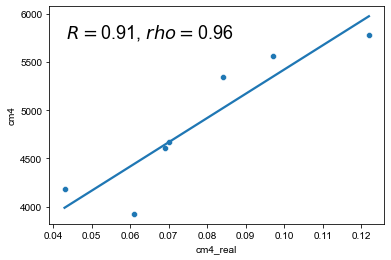

In [5]:
ax=sns.scatterplot(df[x], df[y])
xi = np.array(df[x])
yi = np.array(df[y])

m, b = np.polyfit(xi, yi, deg=1)
y_fit = m * xi + b

#ax=sns.regplot(df[x], df[y]

ax=sns.regplot(df[x], df[y],scatter=False,ci = None)

text='$\it{R = }$' + str(R)+", $\it{rho = }$"+str(rho)

anc = AnchoredText(text, loc="upper left", frameon=False,prop=dict(fontsize=18))
ax.add_artist(anc)
plt.savefig(file +'_'+x+'_'+y+'.pdf', dpi=300, bbox_inches='tight')
#plt.text(0.05, 0.9, '$\it{R = }$' + str(R)+", $\it{rho = }$"+str(rho), horizontalalignment='left', verticalalignment='bottom', fontsize=30)